# Alura Cash - Semana 2

## Importando a base de dados

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc('figure', figsize = (14, 6))

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
dados = pd.read_csv('/content/analise_risco.csv')

## Informações gerais da base de dados

In [58]:
dados

,id_solicitante,id_solicitacao_emprestimo,id_historico_banco,id_solicitante.1,idade,salario,situacao_imovel,tempo_trabalho,id_solicitacao_emprestimo.1,motivo,pontuacao,valor_total_solicitado,taxa_juros,possibilidade_inadimplencia,renda_percentual,id_historico_banco.1,inadimplencia_anteior,tempo_primeira_solicitacao
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,AspC7qDK-5Esh,21.0,60000.0,Aluguel,2.0,kZHfWgGv-0dWJ,Educativo,B,8000.0,11.26,0.0,0.13,UwfbzeaW-9tQt,N,3
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,2NjYU2iT-fGSm,40.0,70000.0,Hipoteca,6.0,j7elJxsY-eTEQ,Educativo,A,18000.0,7.90,0.0,0.26,viRQ2WYn-yJ2G,N,14
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,nTOKgZCT-YPUD,29.0,115000.0,Hipoteca,3.0,t9dKvc6a-4eAL,Medico,C,22000.0,15.23,0.0,0.19,IEHObaim-KPC9,S,7
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,J3jGNZeh-OzZE,26.0,84996.0,Aluguel,0.0,NaelpPC5-t2kz,Medico,B,9000.0,11.26,0.0,0.11,GvqL52S8-S8OH,N,2
4,flpZfspk-bUuL,4NHe4vfi-QLvW,fbc8cPEp-uJEB,flpZfspk-bUuL,23.0,54500.0,Aluguel,2.0,4NHe4vfi-QLvW,Pagamento_debitos,A,8000.0,NaN,0.0,0.15,fbc8cPEp-uJEB,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,vuapM6Wp-q7r1,ZjdyUQ9p-0x7B,FSggdWZM-oovG,vuapM6Wp-q7r1,22.0,52000.0,Aluguel,6.0,ZjdyUQ9p-0x7B,Empreendimento,B,10000.0,11.71,0.0,0.19,FSggdWZM-oovG,N,2
996,45zjIWAZ-OiTY,tD7HX4GM-ibaP,b3oEdGbE-0QWA,45zjIWAZ-OiTY,24.0,40000.0,Aluguel,0.0,tD7HX4GM-ibaP,Pessoal,A,10000.0,8.49,0.0,0.25,b3oEdGbE-0QWA,N,3
997,9hEOBJhs-9GLm,Bli5FFo1-U9yw,JF87OvRO-Y293,9hEOBJhs-9GLm,22.0,12000.0,Hipoteca,7.0,Bli5FFo1-U9yw,Educativo,D,1500.0,14.84,0.0,0.13,JF87OvRO-Y293,S,3
998,HytJWYNG-ydng,pSHBtD09-jcj7,Ri8xl6Ro-hHgH,HytJWYNG-ydng,26.0,45000.0,Aluguel,3.0,pSHBtD09-jcj7,Medico,A,6000.0,7.49,0.0,0.13,Ri8xl6Ro-hHgH,N,3


## Limpando colunas que não iremos usar

In [59]:
dados = dados.drop(columns=['id_solicitante', 'id_solicitacao_emprestimo', 'id_historico_banco', 'id_solicitante.1', 'id_solicitacao_emprestimo.1', 'id_historico_banco.1'])
dados

,idade,salario,situacao_imovel,tempo_trabalho,motivo,pontuacao,valor_total_solicitado,taxa_juros,possibilidade_inadimplencia,renda_percentual,inadimplencia_anteior,tempo_primeira_solicitacao
0,21.0,60000.0,Aluguel,2.0,Educativo,B,8000.0,11.26,0.0,0.13,N,3
1,40.0,70000.0,Hipoteca,6.0,Educativo,A,18000.0,7.90,0.0,0.26,N,14
2,29.0,115000.0,Hipoteca,3.0,Medico,C,22000.0,15.23,0.0,0.19,S,7
3,26.0,84996.0,Aluguel,0.0,Medico,B,9000.0,11.26,0.0,0.11,N,2
4,23.0,54500.0,Aluguel,2.0,Pagamento_debitos,A,8000.0,NaN,0.0,0.15,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22.0,52000.0,Aluguel,6.0,Empreendimento,B,10000.0,11.71,0.0,0.19,N,2
996,24.0,40000.0,Aluguel,0.0,Pessoal,A,10000.0,8.49,0.0,0.25,N,3
997,22.0,12000.0,Hipoteca,7.0,Educativo,D,1500.0,14.84,0.0,0.13,S,3
998,26.0,45000.0,Aluguel,3.0,Medico,A,6000.0,7.49,0.0,0.13,N,3


## Eliminação de dados nulos

In [60]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        989 non-null    float64
 1   salario                      992 non-null    float64
 2   situacao_imovel              985 non-null    object 
 3   tempo_trabalho               974 non-null    float64
 4   motivo                       993 non-null    object 
 5   pontuacao                    992 non-null    object 
 6   valor_total_solicitado       990 non-null    float64
 7   taxa_juros                   906 non-null    float64
 8   possibilidade_inadimplencia  989 non-null    float64
 9   renda_percentual             992 non-null    float64
 10  inadimplencia_anteior        988 non-null    object 
 11  tempo_primeira_solicitacao   1000 non-null   int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 93.9+ KB


In [61]:
dados.isna().sum()

idade                          11
salario                         8
situacao_imovel                15
tempo_trabalho                 26
motivo                          7
pontuacao                       8
valor_total_solicitado         10
taxa_juros                     94
possibilidade_inadimplencia    11
renda_percentual                8
inadimplencia_anteior          12
tempo_primeira_solicitacao      0
dtype: int64

In [62]:
dados.dropna(inplace = True)
dados.isna().sum()

idade                          0
salario                        0
situacao_imovel                0
tempo_trabalho                 0
motivo                         0
pontuacao                      0
valor_total_solicitado         0
taxa_juros                     0
possibilidade_inadimplencia    0
renda_percentual               0
inadimplencia_anteior          0
tempo_primeira_solicitacao     0
dtype: int64

## Analise dos dados

In [63]:
dados.describe()

,idade,salario,tempo_trabalho,valor_total_solicitado,taxa_juros,possibilidade_inadimplencia,renda_percentual,tempo_primeira_solicitacao
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,27.663529,65269.381176,4.708235,9417.352941,10.978365,0.203529,0.164824,5.758824
std,6.075668,38598.523818,4.169783,6122.474027,3.247242,0.402860,0.104256,4.139721
min,21.000000,9600.000000,0.000000,1000.000000,5.420000,0.000000,0.010000,2.000000
25%,23.000000,40000.000000,2.000000,5000.000000,7.885000,0.000000,0.080000,3.000000
50%,26.000000,57000.000000,4.000000,8000.000000,10.990000,0.000000,0.140000,4.000000
75%,30.000000,80000.000000,7.000000,12000.000000,13.410000,0.000000,0.220000,8.000000
max,60.000000,370000.000000,28.000000,35000.000000,22.110000,1.000000,0.680000,30.000000


In [64]:
dados['tempo_trabalho'] = dados['tempo_trabalho'].astype('int64')

## Tratamento dos dados

In [65]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        850 non-null    float64
 1   salario                      850 non-null    float64
 2   situacao_imovel              850 non-null    object 
 3   tempo_trabalho               850 non-null    int64  
 4   motivo                       850 non-null    object 
 5   pontuacao                    850 non-null    object 
 6   valor_total_solicitado       850 non-null    float64
 7   taxa_juros                   850 non-null    float64
 8   possibilidade_inadimplencia  850 non-null    float64
 9   renda_percentual             850 non-null    float64
 10  inadimplencia_anteior        850 non-null    object 
 11  tempo_primeira_solicitacao   850 non-null    int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 86.3+ KB


In [66]:
dados.corr()

,idade,salario,tempo_trabalho,valor_total_solicitado,taxa_juros,possibilidade_inadimplencia,renda_percentual,tempo_primeira_solicitacao
idade,1.000000,0.102272,0.177488,0.008258,0.026722,0.009244,-0.063819,0.882519
salario,0.102272,1.000000,0.176687,0.357591,-0.065924,-0.189389,-0.343208,0.060122
tempo_trabalho,0.177488,0.176687,1.000000,0.118633,-0.048133,-0.090118,-0.039514,0.156339
valor_total_solicitado,0.008258,0.357591,0.118633,1.000000,0.123444,0.110156,0.614078,0.010316
taxa_juros,0.026722,-0.065924,-0.048133,0.123444,1.000000,0.399625,0.133759,0.037467
possibilidade_inadimplencia,0.009244,-0.189389,-0.090118,0.110156,0.399625,1.000000,0.333036,0.025937
renda_percentual,-0.063819,-0.343208,-0.039514,0.614078,0.133759,0.333036,1.000000,-0.026885
tempo_primeira_solicitacao,0.882519,0.060122,0.156339,0.010316,0.037467,0.025937,-0.026885,1.000000


In [67]:
dados2 = dados.drop('renda_percentual', axis = 1)

In [68]:
dicionario = {
    'N': 0,
    'S': 1
}

dados2.replace(dicionario, inplace = True)

In [69]:
x = dados2.drop(['possibilidade_inadimplencia'], axis = 1)
y = dados2['possibilidade_inadimplencia']

## One Hot Encoding

In [70]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [71]:
colunas_categoricas = ['situacao_imovel','motivo','pontuacao']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(), colunas_categoricas),
    remainder='passthrough')

dados_transformados = one_hot_enc.fit_transform(x)
dados_transformados = pd.DataFrame(dados_transformados, columns=one_hot_enc.get_feature_names_out())
dados_transformados.head()

,onehotencoder__situacao_imovel_Aluguel,onehotencoder__situacao_imovel_Hipoteca,onehotencoder__situacao_imovel_Outros,onehotencoder__situacao_imovel_Propria,onehotencoder__motivo_Educativo,onehotencoder__motivo_Empreendimento,onehotencoder__motivo_Medico,onehotencoder__motivo_Melhora_lar,onehotencoder__motivo_Pagamento_debitos,onehotencoder__motivo_Pessoal,...,onehotencoder__pontuacao_E,onehotencoder__pontuacao_F,onehotencoder__pontuacao_G,remainder__idade,remainder__salario,remainder__tempo_trabalho,remainder__valor_total_solicitado,remainder__taxa_juros,remainder__inadimplencia_anteior,remainder__tempo_primeira_solicitacao
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,60000.0,2.0,8000.0,11.26,0.0,3.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,40.0,70000.0,6.0,18000.0,7.90,0.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,29.0,115000.0,3.0,22000.0,15.23,1.0,7.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,26.0,84996.0,0.0,9000.0,11.26,0.0,2.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,23.0,24000.0,7.0,5000.0,7.49,0.0,2.0


## Nomalização dos dados

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
scaler.fit(dados_transformados)

MinMaxScaler()

In [75]:
dados_transformados = scaler.transform(dados_transformados)

In [76]:
dados_transformados = pd.DataFrame(dados_transformados, columns = one_hot_enc.get_feature_names_out())
dados_transformados

,onehotencoder__situacao_imovel_Aluguel,onehotencoder__situacao_imovel_Hipoteca,onehotencoder__situacao_imovel_Outros,onehotencoder__situacao_imovel_Propria,onehotencoder__motivo_Educativo,onehotencoder__motivo_Empreendimento,onehotencoder__motivo_Medico,onehotencoder__motivo_Melhora_lar,onehotencoder__motivo_Pagamento_debitos,onehotencoder__motivo_Pessoal,...,onehotencoder__pontuacao_E,onehotencoder__pontuacao_F,onehotencoder__pontuacao_G,remainder__idade,remainder__salario,remainder__tempo_trabalho,remainder__valor_total_solicitado,remainder__taxa_juros,remainder__inadimplencia_anteior,remainder__tempo_primeira_solicitacao
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.139845,0.071429,0.205882,0.349910,0.0,0.035714
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.487179,0.167592,0.214286,0.500000,0.148592,0.0,0.428571
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.205128,0.292453,0.107143,0.617647,0.587777,1.0,0.178571
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.128205,0.209201,0.000000,0.235294,0.349910,0.0,0.000000
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.051282,0.039956,0.250000,0.117647,0.124026,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.025641,0.117647,0.214286,0.264706,0.376872,0.0,0.000000
846,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.076923,0.084351,0.000000,0.264706,0.183942,0.0,0.035714
847,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.025641,0.006659,0.250000,0.014706,0.564410,1.0,0.035714
848,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.128205,0.098224,0.107143,0.147059,0.124026,0.0,0.035714


## Separação dos dados

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
SEED = 144

x_treino, x_teste, y_treino, y_teste = train_test_split(dados_transformados, y, random_state = SEED, stratify = y)
y_treino

726    0.0
101    0.0
685    0.0
955    0.0
508    0.0
      ... 
772    1.0
82     0.0
588    0.0
237    1.0
665    0.0
Name: possibilidade_inadimplencia, Length: 637, dtype: float64

## Modelos

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [80]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.colors

In [81]:
y_treino.unique()
y_teste.unique()

array([0., 1.])

## Oversampling

In [82]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = SEED)
X_balanceado_over, y_balanceado_over = smote.fit_resample(x_treino, y_treino)
X_balanceado_over

,onehotencoder__situacao_imovel_Aluguel,onehotencoder__situacao_imovel_Hipoteca,onehotencoder__situacao_imovel_Outros,onehotencoder__situacao_imovel_Propria,onehotencoder__motivo_Educativo,onehotencoder__motivo_Empreendimento,onehotencoder__motivo_Medico,onehotencoder__motivo_Melhora_lar,onehotencoder__motivo_Pagamento_debitos,onehotencoder__motivo_Pessoal,...,onehotencoder__pontuacao_E,onehotencoder__pontuacao_F,onehotencoder__pontuacao_G,remainder__idade,remainder__salario,remainder__tempo_trabalho,remainder__valor_total_solicitado,remainder__taxa_juros,remainder__inadimplencia_anteior,remainder__tempo_primeira_solicitacao
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.179487,0.134295,0.392857,0.167647,0.273817,0.000000,0.107143
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.358974,0.056604,0.000000,0.161029,0.000000,0.000000,0.178571
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.102564,0.089900,0.071429,0.029412,0.229479,0.000000,0.035714
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.179487,0.139845,0.142857,0.205882,0.147394,0.000000,0.107143
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.051282,0.228635,0.000000,0.351471,0.272019,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.348924,0.0,0.0,0.146099,0.194356,0.248330,0.271584,0.640831,1.000000,0.121275
1010,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.218757,0.384266,0.207593,0.393054,0.533704,0.546847,0.103797
1011,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.084380,0.103221,0.148050,0.464930,0.143277,0.000000,0.071429
1012,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.187597,0.037455,0.009585,0.274008,0.161876,0.000000,0.140232


### DecisionTreeClassifier

In [83]:
arvore = DecisionTreeClassifier(random_state=SEED)
arvore.fit(X_balanceado_over, y_balanceado_over)
previsao_arvore = arvore.predict(x_teste)
print(classification_report(y_teste, previsao_arvore))

              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83       170
         1.0       0.40      0.58      0.48        43

    accuracy                           0.74       213
   macro avg       0.64      0.68      0.65       213
weighted avg       0.78      0.74      0.76       213



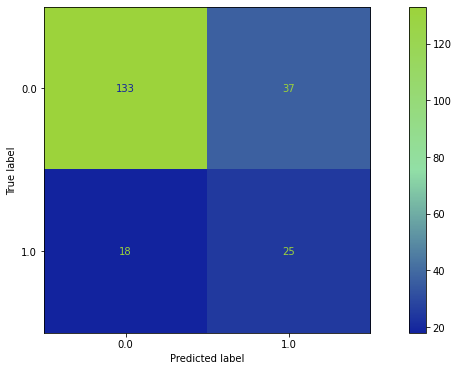

In [84]:
mapa_calor = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#12239e","#92dfa6","#9cd33b"])
ConfusionMatrixDisplay.from_estimator(arvore, x_teste, y_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

### GradientBoostingClassifier

In [85]:
gboost = GradientBoostingClassifier(random_state=SEED)
gboost.fit(X_balanceado_over, y_balanceado_over)
previsao_gboost = gboost.predict(x_teste)
print(classification_report(y_teste, previsao_gboost))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       170
         1.0       0.53      0.60      0.57        43

    accuracy                           0.81       213
   macro avg       0.71      0.73      0.72       213
weighted avg       0.82      0.81      0.82       213



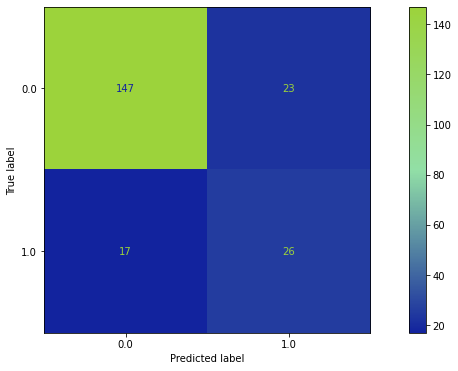

In [89]:
ConfusionMatrixDisplay.from_estimator(gboost, x_teste, y_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

### LogisticRegression

In [86]:
reg_logistica = LogisticRegression(random_state=SEED, max_iter =1000)
reg_logistica.fit(X_balanceado_over, y_balanceado_over)
previsao_reglog = reg_logistica.predict(x_teste)
print(classification_report(y_teste, previsao_reglog))

              precision    recall  f1-score   support

         0.0       0.92      0.76      0.83       170
         1.0       0.44      0.74      0.55        43

    accuracy                           0.76       213
   macro avg       0.68      0.75      0.69       213
weighted avg       0.82      0.76      0.78       213



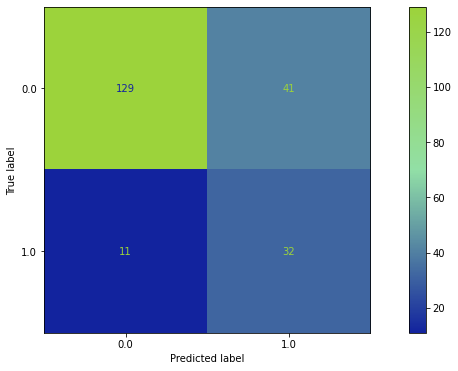

In [91]:
ConfusionMatrixDisplay.from_estimator(reg_logistica, x_teste, y_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

In [92]:
from sklearn.metrics import recall_score
metricas_over = pd.DataFrame({'Acurácia treino':[arvore.score(x_treino, y_treino), 
                                 gboost.score(x_treino, y_treino), 
                                 reg_logistica.score(x_treino, y_treino)], 
            'Acurácia teste': [arvore.score(x_teste, y_teste), 
                                 gboost.score(x_teste, y_teste), 
                                 reg_logistica.score(x_teste, y_teste)], 
            'Recall':[recall_score(y_teste, previsao_arvore),
                      recall_score(y_teste, previsao_gboost),
                      recall_score(y_teste, previsao_reglog)]},
             index = ['Árvore de Decisão Oversampling', 'Gradient Boosting Oversampling', 'Regressão Logísitica Oversampling'])

## Undersampling

In [97]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=SEED,sampling_strategy=0.5)
X_balanceado_under, y_balanceado_under = under.fit_resample(x_treino, y_treino)
X_balanceado_under

,onehotencoder__situacao_imovel_Aluguel,onehotencoder__situacao_imovel_Hipoteca,onehotencoder__situacao_imovel_Outros,onehotencoder__situacao_imovel_Propria,onehotencoder__motivo_Educativo,onehotencoder__motivo_Empreendimento,onehotencoder__motivo_Medico,onehotencoder__motivo_Melhora_lar,onehotencoder__motivo_Pagamento_debitos,onehotencoder__motivo_Pessoal,...,onehotencoder__pontuacao_E,onehotencoder__pontuacao_F,onehotencoder__pontuacao_G,remainder__idade,remainder__salario,remainder__tempo_trabalho,remainder__valor_total_solicitado,remainder__taxa_juros,remainder__inadimplencia_anteior,remainder__tempo_primeira_solicitacao
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.025641,0.060766,0.107143,0.102941,0.267226,0.0,0.000000
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.028868,0.071429,0.044118,0.252247,0.0,0.035714
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.076923,0.026637,0.071429,0.029412,0.483523,0.0,0.071429
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.103774,0.178571,0.176471,0.571600,1.0,0.035714
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.076923,0.189789,0.285714,0.076471,0.000000,0.0,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.410256,0.007658,0.107143,0.088235,0.273817,0.0,0.392857
386,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.076923,0.092275,0.285714,0.441176,0.208508,0.0,0.035714
387,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.051282,0.139845,0.250000,0.705882,0.289395,0.0,0.000000
388,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.128205,0.051054,0.178571,0.258824,0.112043,0.0,0.071429


###DecisionTreeClassifier

In [98]:
arvore = DecisionTreeClassifier(random_state=SEED)
arvore.fit(X_balanceado_under, y_balanceado_under)
previsao_arvore = arvore.predict(x_teste)
print(classification_report(y_teste, previsao_arvore))

              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83       170
         1.0       0.39      0.51      0.44        43

    accuracy                           0.74       213
   macro avg       0.63      0.66      0.64       213
weighted avg       0.77      0.74      0.75       213



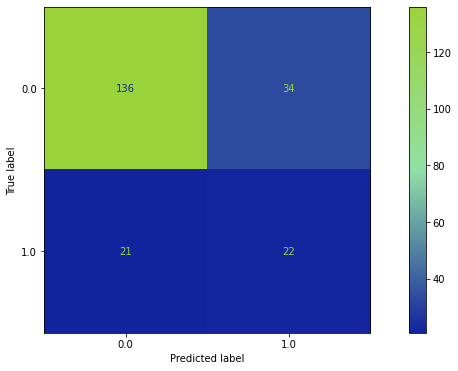

In [100]:
ConfusionMatrixDisplay.from_estimator(arvore, x_teste, y_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

###GradientBoostingClassifier

In [101]:
gboost = GradientBoostingClassifier(random_state=SEED)
gboost.fit(X_balanceado_under, y_balanceado_under)
previsao_gboost = gboost.predict(x_teste)
print(classification_report(y_teste, previsao_gboost))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       170
         1.0       0.56      0.56      0.56        43

    accuracy                           0.82       213
   macro avg       0.72      0.72      0.72       213
weighted avg       0.82      0.82      0.82       213



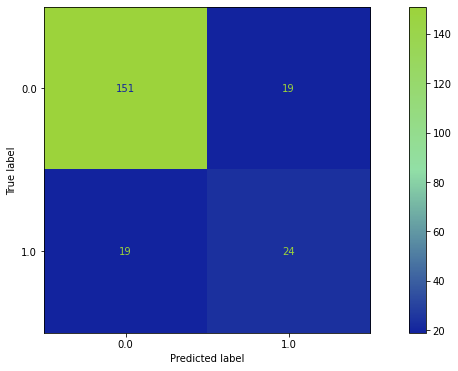

In [103]:
ConfusionMatrixDisplay.from_estimator(gboost, x_teste, y_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

### LogisticRegression

In [105]:
reg_logistica = LogisticRegression(random_state=SEED, max_iter =1000)
reg_logistica.fit(X_balanceado_under, y_balanceado_under)
previsao_reglog = reg_logistica.predict(x_teste)
print(classification_report(y_teste, previsao_reglog))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89       170
         1.0       0.55      0.51      0.53        43

    accuracy                           0.82       213
   macro avg       0.71      0.70      0.71       213
weighted avg       0.81      0.82      0.81       213



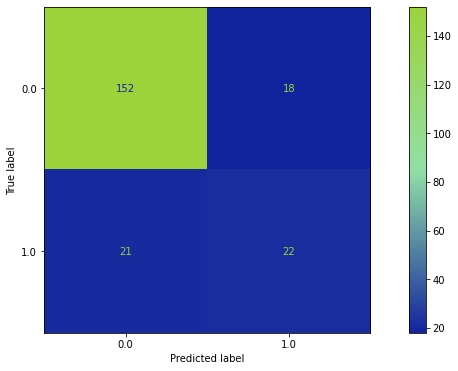

In [106]:
ConfusionMatrixDisplay.from_estimator(reg_logistica, x_teste, y_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

In [108]:
metricas_under = pd.DataFrame({'Acurácia treino':[arvore.score(x_treino, y_treino), 
                                 gboost.score(x_treino, y_treino), 
                                 reg_logistica.score(x_treino, y_treino)], 
            'Acurácia teste': [arvore.score(x_teste, y_teste), 
                                 gboost.score(x_teste, y_teste), 
                                 reg_logistica.score(x_teste, y_teste)], 
            'Recall':[recall_score(y_teste, previsao_arvore),
                      recall_score(y_teste, previsao_gboost),
                      recall_score(y_teste, previsao_reglog)]},
             index = ['Árvore de Decisão Undersampling', 'Gradient Boosting Undersampling', 'Regressão Logísitica Undersampling'])

###Comparação

In [109]:
display(metricas_over,metricas_under)

,Acurácia treino,Acurácia teste,Recall
Árvore de Decisão Oversampling,1.000000,0.741784,0.581395
Gradient Boosting Oversampling,0.956044,0.812207,0.604651
Regressão Logísitica Oversampling,0.816327,0.755869,0.744186


,Acurácia treino,Acurácia teste,Recall
Árvore de Decisão Undersampling,0.923077,0.741784,0.511628
Gradient Boosting Undersampling,0.960754,0.821596,0.558140
Regressão Logísitica Undersampling,0.844584,0.816901,0.511628


##Otimização de hiperparâmetros


In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
parameters = {
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "absolute_error"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9],
    "n_estimators":[10,100]
    }

In [113]:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state = SEED), parameters,scoring='recall',cv=3,verbose = 1)

grid_search.fit(X_balanceado_under, y_balanceado_under)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/p

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=144),
             param_grid={'criterion': ['friedman_mse', 'absolute_error'],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [10, 100],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9]},
             scoring='recall', verbose=1)

In [114]:
previsao_grid_search = grid_search.best_estimator_
previsao_grid = previsao_grid_search.predict(x_teste)

In [115]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='absolute_error', max_depth=8,
                           max_features='log2', random_state=144,
                           subsample=0.9)

In [117]:
print(classification_report(y_teste, previsao_grid))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       170
         1.0       0.60      0.60      0.60        43

    accuracy                           0.84       213
   macro avg       0.75      0.75      0.75       213
weighted avg       0.84      0.84      0.84       213



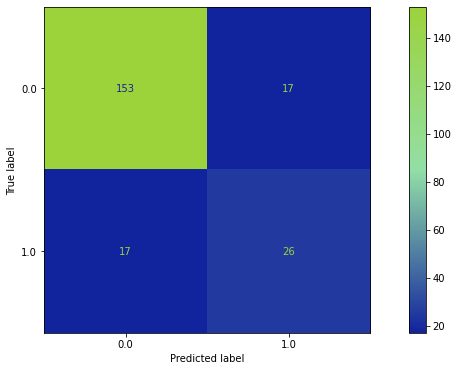

In [119]:
ConfusionMatrixDisplay.from_estimator(previsao_grid_search, x_teste, y_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

## Exportando Modelos

In [121]:
import pickle

In [122]:
with open('one_hot_encoder.pkl', 'wb') as file:
    pickle.dump(one_hot_enc, file)

In [123]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [124]:
with open('modelo_treinado.pkl', 'wb') as file:
    pickle.dump(previsao_grid_search, file)